1. Méthodologie
Pour atteindre nos objectifs, nous allons effectuer les étapes suivantes :

1. Chargement et exploration initiale de la dataset.
2. Analyse statistique descriptive des variables clés.
3. Visualisation des tendances temporelles de la présence des occupants.
4. Analyse des types d'activités les plus fréquents.
5. Étude des relations entre les activités, les étages, les espaces et les zones.

## 1. Chargement et exploration initiale de la dataset.

In [76]:
## Chargement et exploration initiale de la dataset.

import pandas as pd
import numpy as np 
import os

# Get a list of all .csv files in the current directory
csv_files = [file for file in os.listdir('.') if file.endswith('.csv')]

# Create a dictionary to store DataFrames with corresponding names for each .csv file
dfs = {}

# Read each .csv file, rename the DataFrame, and store it in the dictionary
for file_name in csv_files:
    df_name = file_name.replace('.csv', '')  # Extract DataFrame name from the file name
    dfs[df_name] = pd.read_csv(file_name)  # Create DataFrame with the extracted name

# Perform the merge based on a common key (e.g., 'common_column')
# Replace 'common_column' with the actual column name that is common across all DataFrames
merged_df = dfs['01_occ']  # Initialize merged_df with one of the DataFrames
for df_name, df in dfs.items():
    if df_name != '01_occ':  # Skip the first DataFrame since it's already stored in merged_df
        merged_df = pd.merge(merged_df, df, on='timestamp [dd/mm/yyyy HH:MM]', how='inner')

# Now you have a merged DataFrame named 'merged_df' containing data from all .csv files
nan_df = merged_df.isna()

# If there are any NaN values, the nan_df DataFrame will contain True in those positions.
# You can check if there are any NaN values in the entire DataFrame by using the any() method.
if nan_df.any().any():
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")


print("le nombre de variables : " , merged_df.shape[1], " et ",  merged_df.shape[0], "données caprurés sur toutes l'année 2013")
merged_df.info()

The DataFrame does not contain NaN values.
le nombre de variables :  64  et  8760 données caprurés sur toutes l'année 2013
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   timestamp [dd/mm/yyyy HH:MM]                                  8760 non-null   object 
 1   ki [0:vacant 1:occupied]                                      8760 non-null   float64
 2   o1_1 [0:vacant 1:occupied]                                    8760 non-null   float64
 3   o1_2 [0:vacant 1:occupied]                                    8760 non-null   float64
 4   o1_3 [0:vacant 1:occupied]                                    8760 non-null   float64
 5   o1_4 [0:vacant 1:occupied]                                    8760 non-null   float64
 6   o1_5 [0:vacant 1:occupied]           

## 2. Analyse statistique descriptive des variables clés.

In [77]:
## Analyse statistique descriptive des variables clés.

Pour effectuer une analyse statistique descriptive des variables clés de la présence dans la dataset fournie, nous allons nous concentrer sur les colonnes suivantes : "timestamp," "Ki [0:vacant 1:occupied] [0:vacant 1:occupied]" (cuisine), et "o1_1," "o1_2," "o1_3," "o1_4," "o1_5," "o2," "o3," "o4" (bureaux).

"timestamp" représente la date et l'heure au format "dd/mm/yyyy HH:MM".
"ki" représente l'occupation de la cuisine (0 pour vacant, 1 pour occupé).

Les colonnes commençant par "o1_1," "o1_2," ... jusqu'à "o4" représentent l'occupation des bureaux.
Analyse Statistique Descriptive :

Occupation de la Cuisine (ki) :

La présence dans la cuisine peut être résumée en calculant la moyenne, la médiane et l'écart type de la colonne "ki" pour toute la période de la dataset.
Le pourcentage d'occupation de la cuisine peut également être calculé en comptant le nombre de 1 (occupé) et en le divisant par le nombre total d'échantillons.
Occupation des Bureaux (o1_1, o1_2, ... o4) :

De manière similaire, pour les bureaux, nous pouvons calculer les statistiques descriptives telles que la moyenne, la médiane et l'écart type pour chaque bureau individuellement.
De plus, nous pouvons calculer le pourcentage d'occupation de chaque bureau en comptant le nombre de 1 (occupé) et en le divisant par le nombre total d'échantillons.
Tendances Temporelles :

Nous pouvons également examiner les tendances temporelles de l'occupation de la cuisine et des bureaux en utilisant des graphiques de séries chronologiques pour voir comment elles évoluent au fil du temps.
Corrélations :

Pour explorer d'éventuelles corrélations, nous pouvons calculer des corrélations entre l'occupation de la cuisine et celle des bureaux. Cela pourrait nous indiquer si certaines zones de bureaux sont plus fréquemment occupées lorsque la cuisine l'est également, par exemple.
Ces analyses statistiques nous permettront de mieux comprendre les schémas de présence dans la dataset, ce qui peut être utile pour prendre des décisions en matière de gestion de l'espace de bureau et de planification des ressources.

Statistiques pour la Cuisine :

Nombre d'observations (count) : Il y a un total de 35 040 observations pour la cuisine.
Moyenne (mean) : La moyenne d'occupation de la cuisine est d'environ 8,58%. Cela signifie que la cuisine est occupée en moyenne pendant environ 8,58% du temps.
Écart-type (std) : L'écart-type est d'environ 20,74%. Cela indique une variation relativement élevée dans l'occupation de la cuisine.
Valeur minimale (min) : La cuisine est parfois complètement non occupée, ce qui est indiqué par une valeur minimale de 0.
25e percentile (25%) : 25% des observations montrent une occupation de la cuisine de 0% (non occupée).
Médiane (50%) : La médiane est également de 0%, ce qui indique que la cuisine est généralement non occupée.
75e percentile (75%) : 75% des observations montrent une occupation de la cuisine de 0%.
Valeur maximale (max) : La cuisine est occupée à 100% au maximum, ce qui signifie qu'il y a des périodes où la cuisine est occupée en continu.
Statistiques pour les Bureaux :

Les statistiques pour les bureaux indiquent que ces espaces ont des taux d'occupation légèrement plus élevés que la cuisine, avec une moyenne oscillant entre environ 12,92% et 19,01%.
L'écart-type varie entre environ 29,14% et 36,35%, montrant une certaine variabilité dans l'occupation des bureaux.
Les valeurs minimales pour les bureaux sont de 0 (non occupés).
Les valeurs maximales pour les bureaux sont de 1 (occupés).
Cela signifie que, pour les bureaux, il y a également des périodes où ils sont occupés à 100%, mais ils ont tendance à être plus fréquemment occupés que la cuisine.

En résumé, ces statistiques révèlent que la cuisine est généralement non occupée, tandis que les bureaux ont des taux d'occupation plus élevés et une plus grande variabilité d'occupation. Ces informations peuvent être utiles pour planifier l'utilisation de l'espace dans le bâtiment et optimiser les ressources en conséquence.


Statistiques pour la Cuisine :
count    35040.000000
mean         0.085819
std          0.207412
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cuisine, dtype: float64

Statistiques pour les Bureaux :
         Bureau_1_1    Bureau_1_2    Bureau_1_3    Bureau_1_4    Bureau_1_5  \
count  35040.000000  35040.000000  35040.000000  35040.000000  35040.000000   
mean       0.131502      0.158966      0.161984      0.190070      0.169380   
std        0.291381      0.324744      0.336210      0.363464      0.340585   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.080000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           Bureau_

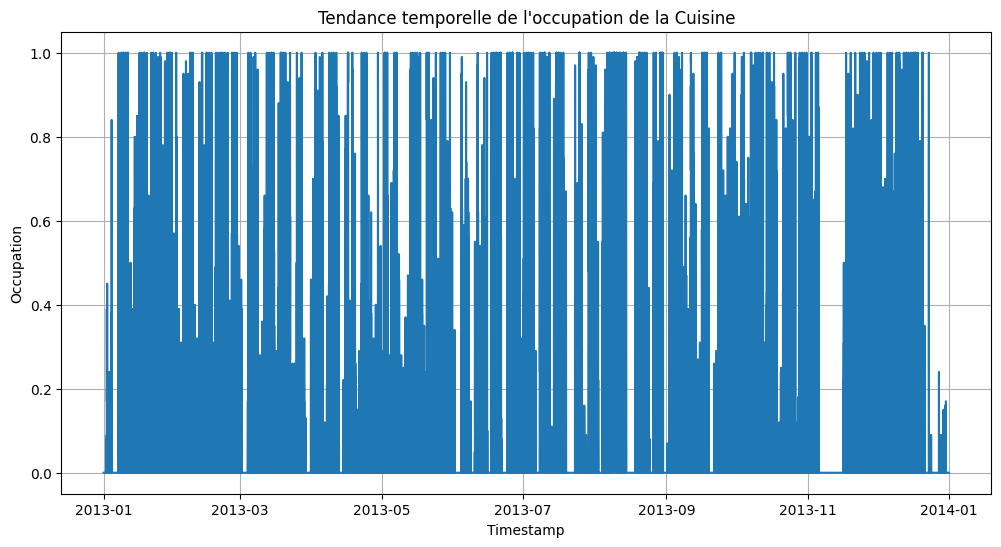

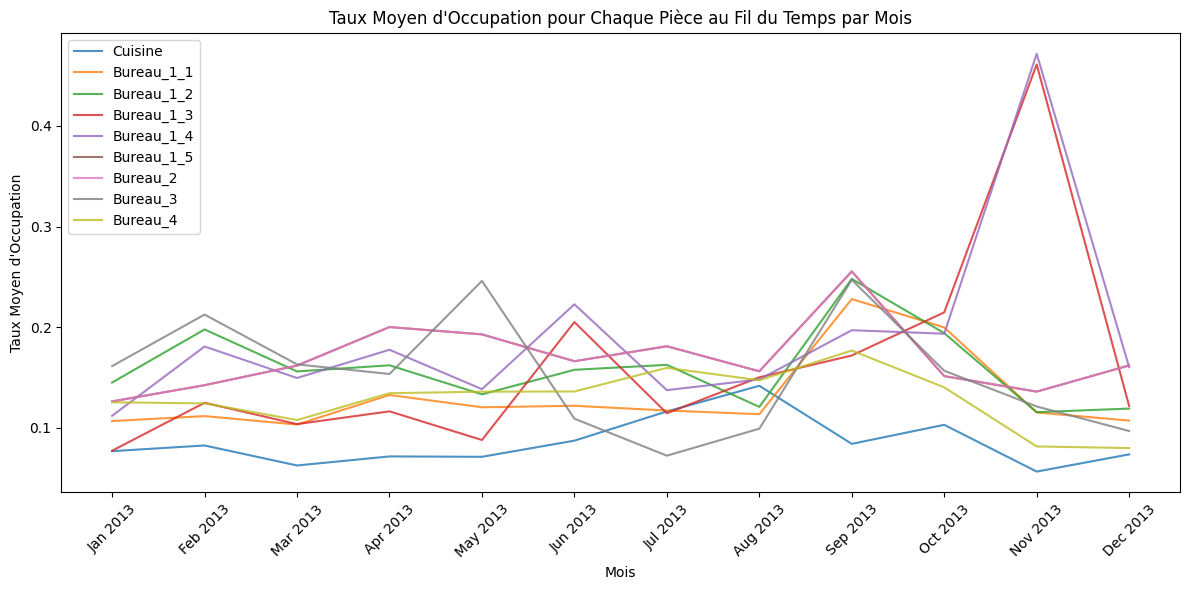

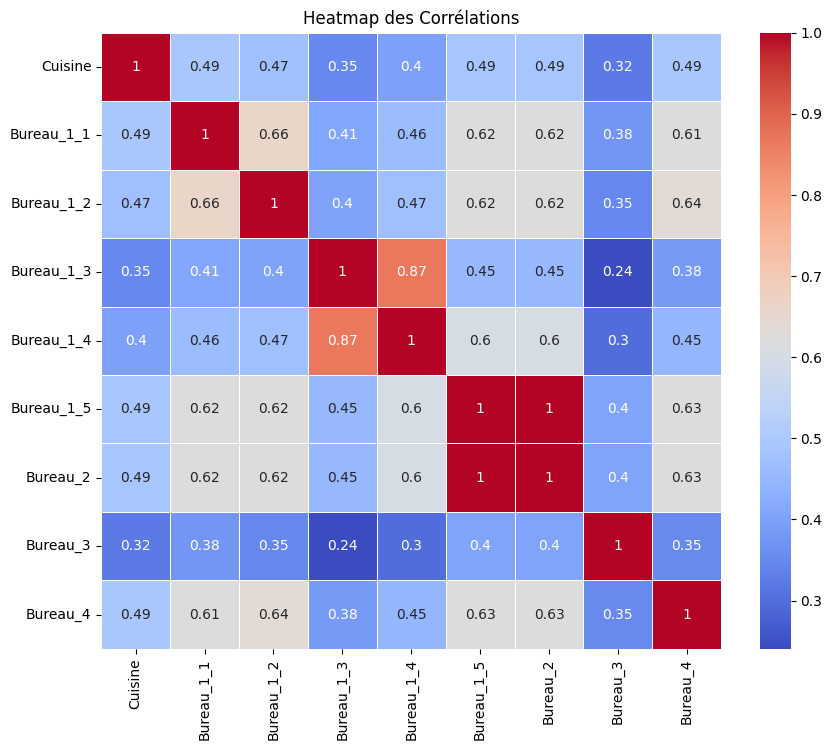

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger la dataset depuis le fichier CSV
data = pd.read_csv("01_occ.csv")

# Renommer les colonnes
data.rename(columns={'ki [0:vacant 1:occupied]': 'Cuisine',
                     'o1_1 [0:vacant 1:occupied]': 'Bureau_1_1',
                     'o1_2 [0:vacant 1:occupied]': 'Bureau_1_2',
                     'o1_3 [0:vacant 1:occupied]': 'Bureau_1_3',
                     'o1_4 [0:vacant 1:occupied]': 'Bureau_1_4',
                     'o1_5 [0:vacant 1:occupied]': 'Bureau_1_5',
                     'o2 [0:vacant 1:occupied]': 'Bureau_2',
                     'o3 [0:vacant 1:occupied]': 'Bureau_3',
                     'o4 [0:vacant 1:occupied]': 'Bureau_4'}, inplace=True)

# 1. Statistiques descriptives pour la cuisine
cuisine_stats = data['Cuisine'].describe()

# 2. Statistiques descriptives pour les bureaux
bureau_stats = data[['Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4']].describe()

# Affichage des statistiques sous forme de tableaux
print("Statistiques pour la Cuisine :")
print(cuisine_stats)
print("\nStatistiques pour les Bureaux :")
print(bureau_stats)

# 3. Visualisation des tendances temporelles pour la cuisine
data['timestamp'] = pd.to_datetime(data['timestamp [dd/mm/yyyy HH:MM]'], format='%d/%m/%Y %H:%M')

plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['Cuisine'])
plt.title("Tendance temporelle de l'occupation de la Cuisine")
plt.xlabel("Timestamp")
plt.ylabel("Occupation")
plt.grid()
plt.show()

## le taux moyen d'occupation pour chaque pièce par mois
# Extraire le mois
data['month'] = data['timestamp'].dt.to_period('M')

# Variables à inclure dans le graphique
room_columns = ['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4']

# Group by month and calculate mean occupancy rate for each room
df_mean_by_month = data.groupby('month')[room_columns].mean()

# Convert the PeriodIndex to strings (month-year format)
df_mean_by_month.index = df_mean_by_month.index.strftime('%b %Y')

# Create a plot chart by month
plt.figure(figsize=(12, 6))
for room_column in room_columns:
    plt.plot(df_mean_by_month.index, df_mean_by_month[room_column], label=room_column, alpha=0.8)

plt.xlabel('Mois')
plt.ylabel('Taux Moyen d\'Occupation')
plt.title('Taux Moyen d\'Occupation pour Chaque Pièce au Fil du Temps par Mois')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Heatmap pour les corrélations
correlation_matrix = data[['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap des Corrélations")
plt.show()


Calcul de la moyenne d'occupation par jour de la semaine,  pour chaque heure de la journée et pour chaque mois de l'année pour différentes zones du bâtiment (cuisine et bureaux) et création d'un heatmap pour visualiser les tendances d'occupation.

C:\Users\ali\AppData\Local\Temp\ipykernel_18696\2639498418.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_occupancy_by_day = data.groupby('day_of_week')['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4'].mean()


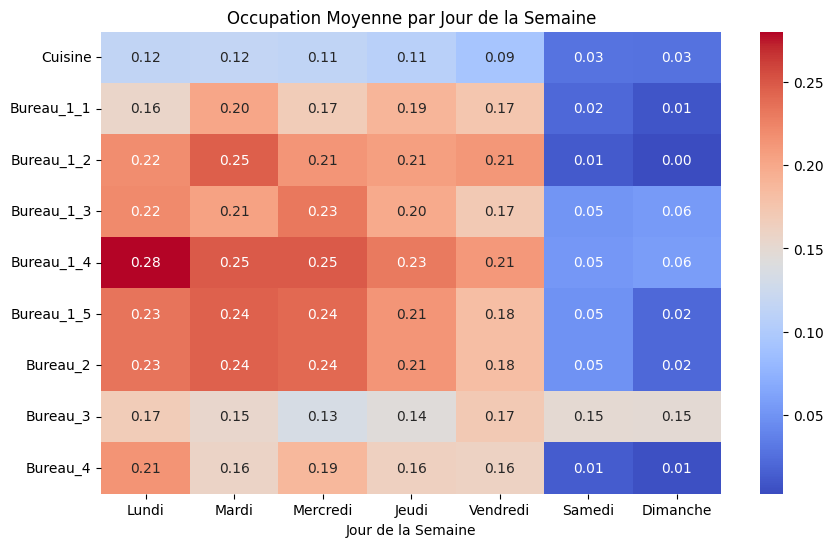

C:\Users\ali\AppData\Local\Temp\ipykernel_18696\2639498418.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_means = data.groupby('hour')['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4'].mean()


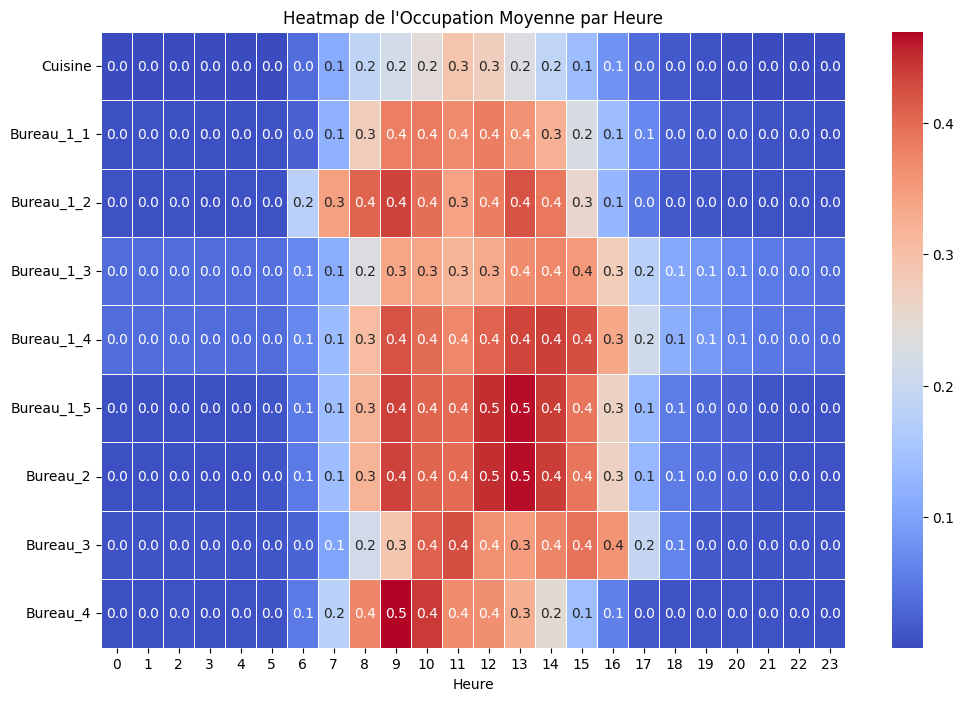

C:\Users\ali\AppData\Local\Temp\ipykernel_18696\2639498418.py:46: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_means = data.groupby('month')['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4'].mean()


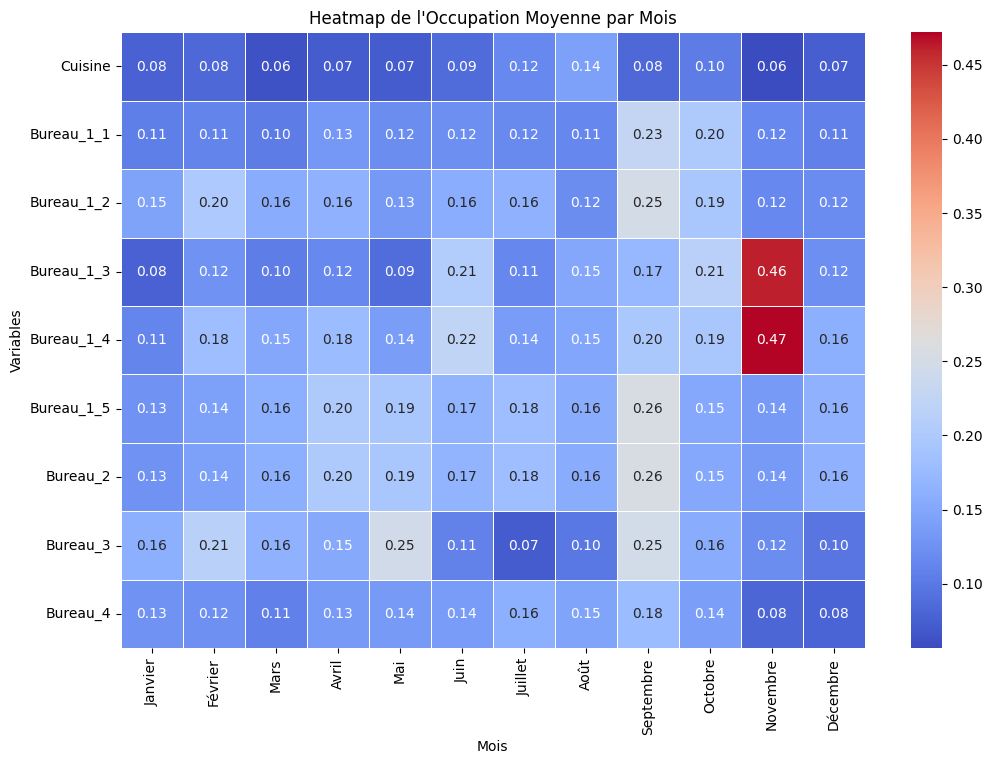

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convertir la colonne 'timestamp' en objet datetime
data['timestamp'] = pd.to_datetime(data['timestamp [dd/mm/yyyy HH:MM]'], format='%d/%m/%Y %H:%M')

# Extraire le jour de la semaine (0=lundi, 6=dimanche)
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Calculer la moyenne d'occupation par jour de la semaine pour toutes les variables
average_occupancy_by_day = data.groupby('day_of_week')['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4'].mean()

# Renommer les jours de la semaine
day_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
average_occupancy_by_day.index = day_labels

# Créer le heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(average_occupancy_by_day.T, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title("Occupation Moyenne par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("")
plt.show()

# Extraire l'heure
data['hour'] = data['timestamp'].dt.hour

# Calculer la moyenne d'occupation pour chaque heure
hourly_means = data.groupby('hour')['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4'].mean()

# Créer un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_means.T, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5 )
plt.title("Heatmap de l'Occupation Moyenne par Heure")
plt.xlabel("Heure")
plt.ylabel("")
plt.show()

# Extraire le mois
data['month'] = data['timestamp'].dt.month

# Calculer la moyenne d'occupation pour chaque mois
monthly_means = data.groupby('month')['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4'].mean()

# Renommer les mois
monthly_means.rename(index={1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin',
                            7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'}, inplace=True)

# Créer un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_means.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap de l'Occupation Moyenne par Mois")
plt.xlabel("Mois")
plt.ylabel("Variables")
plt.show()

##### Analyse de la Tendance Horaire de l'Occupation des Pièces

Extrait l'heure à partir des horodatages de données, puis crée une grille de graphiques pour analyser la tendance horaire de l'occupation de différentes pièces, y compris la cuisine et plusieurs bureaux. Chaque graphique présente le taux d'occupation moyen de la pièce respective par heure, permettant ainsi de visualiser comment l'occupation varie tout au long de la journée. Cela offre des informations précieuses sur les habitudes d'utilisation des pièces au fil du temps.

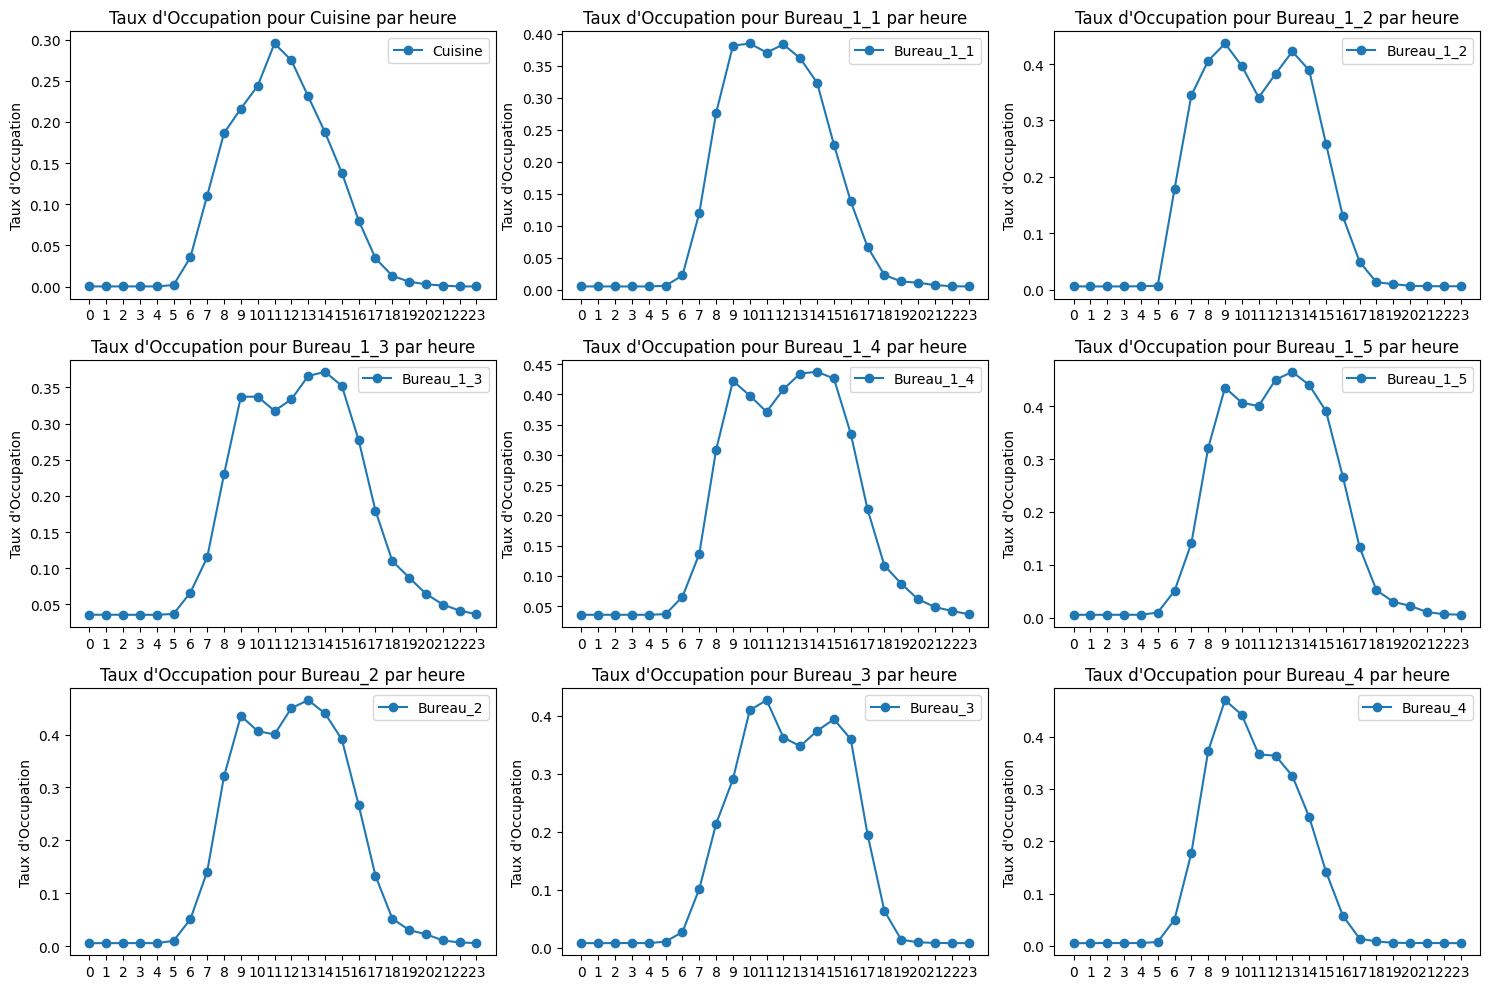

In [80]:
# Analyse de la Tendance Horaire de l'Occupation des Pièces
# Extraire le jour
data['heure'] = data['timestamp'].dt.hour

# Variables à inclure dans le graphique
variables = ['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4']

# Créer une grille de graphiques
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    plt.plot(data.groupby('heure')[var].mean(), marker='o', linestyle='-', label=var)
    plt.xlabel('')
    plt.ylabel('Taux d\'Occupation')
    plt.title(f'Taux d\'Occupation pour {var} par heure')
    plt.xticks(data['heure'].unique())
    plt.legend()

plt.tight_layout()
plt.show()





visualiser la distribution des valeurs de chaque variable en fonction de l'heure et de mettre en évidence les tendances horaires en affichant les moyennes sur chaque graphique. Cela permet de comprendre comment chaque variable varie au fil de la journée.

Pour mettre en évidence les valeurs extrêmes dans les données sans les regrouper, un graphique en boîte (box plot) est souvent utilisé. Le graphique en boîte permet de visualiser la distribution des données, y compris les valeurs médianes, les quartiles et les valeurs aberrantes. Vous pouvez créer un graphique en boîte pour chaque variable ('Cuisine', 'Bureau_1_1', ..., 'Bureau_4') de la manière suivante :


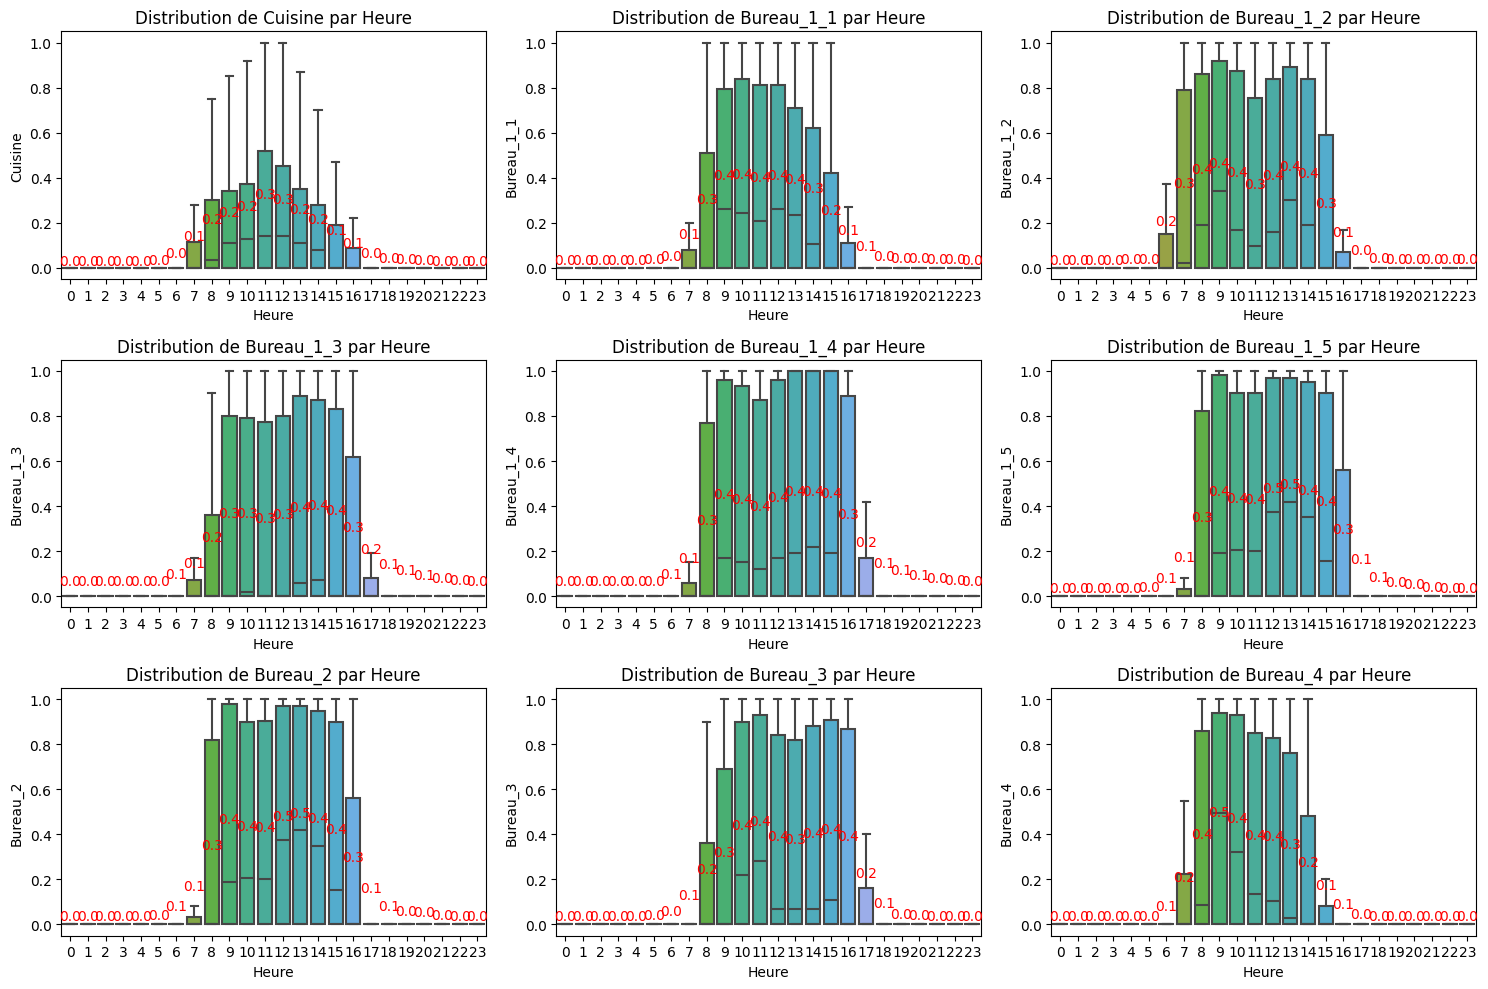

In [81]:
# Extraire l'heure
data['hour'] = data['timestamp'].dt.hour

# Variables à inclure dans le graphique
variables = ['Cuisine', 'Bureau_1_1', 'Bureau_1_2', 'Bureau_1_3', 'Bureau_1_4', 'Bureau_1_5', 'Bureau_2', 'Bureau_3', 'Bureau_4']

# Créer un graphique en boîte pour chaque variable par heure
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    ax = sns.boxplot(x='hour', y=var, data=data, showfliers=False)  # Supprimer les points noirs
    plt.xlabel('Heure')
    plt.ylabel(var)
    plt.title(f'Distribution de {var} par Heure')

    # Ajouter les chiffres (moyennes) sur le graphique
    mean_vals = data.groupby('hour')[var].mean()
    for xtick in ax.get_xticks():
        plt.text(xtick, mean_vals[xtick], f'{mean_vals[xtick]:.1f}', ha='center', va='bottom', color='r')

plt.tight_layout()
plt.show()

Model Prédiction : Anomaly detection using LSTM Autoencoders : 